# Non-Negative Least Squares
将所有系数约束为非负数，可以用来表示某些物理量或者自然非负量（例如，频率）。`LinearRegression`接受布尔值`positive`参数：当设置为`True`时，则应用非负最小二乘法

# Example
在这个例子中，我们拟合一个线性模型，对回归系数施加正约束，并将估计的系数与经典线性回归进行比较

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score

Generate some random data

In [12]:
np.random.seed(50)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples,n_features)
true_coef = 3 * np.random.randn(n_features)
# Threshod coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X,true_coef)

# Add some noise
y += 5 * np.random.normal(size=(n_samples,))


Split the data in train set and test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

Fit the Non-Negative least squares.

In [14]:
from sklearn.linear_model import LinearRegression
reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test,y_pred_nnls)
print("NNLS R2 score",r2_score_nnls)


NNLS R2 score 0.881694757989159


Fit an OLS

In [15]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test,y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.8333808484798131


比较OLS和NNLS的回归系数，可以观察到它们高度相关（虚线是恒等关系），但非负约束将一些系数缩小到0。非负最小二乘法固有地产生稀疏结果。

Text(0, 0.5, 'NNLS regression coefficients')

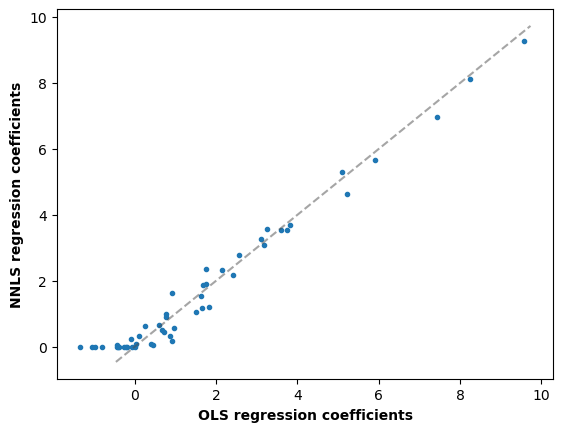

In [ ]:
fig, ax = plt.subplots() #创建一个新的图形(fig)和坐标轴对象(ax)
# 绘制散点图 ax.plot(x, y, linewidth=0, marker='.')
ax.plot(reg_ols.coef_,reg_nnls.coef_,linewidth=0,marker='.')

# 获取x轴和y轴的最小值和最大值
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
# 计算对角线的起止点
# 确保对角线的起止点在x轴和y轴的范围内
low = max(low_x,low_y)
high = min(high_x,high_y)
# 绘制对角线 从(low, low) 到 (high, high)
# 对角线表示“OLS 系数 = NNLS 系数”的理想情况，点越靠近该线，两者越一致。
ax.plot([low,high],[low,high],ls='--',c='.3',alpha=0.5) #alpha=0.5 半透明效果
ax.set_xlabel("OLS regression coefficients",fontweight="bold")
ax.set_ylabel("NNLS regression coefficients",fontweight="bold")